# Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# fetcher dataset

In [2]:
fashion_mnist = keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

## splitting the data into training set and validation set

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# creating the models

In [4]:
# Define the model, as a CNN
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2)))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

SyntaxError: invalid syntax (16323543.py, line 6)

# compiling the model

In [5]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# introducing callbacks

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10.keras", save_best_only=True)

# Training the model

In [7]:
# Train the model
history = model.fit(X_train_full, y_train_full, epochs=100,
                    validation_split=0.2,
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
 630/1250 [==============>...............] - ETA: 57s - loss: 2.0433 - accuracy: 0.3564

# showing validation of model

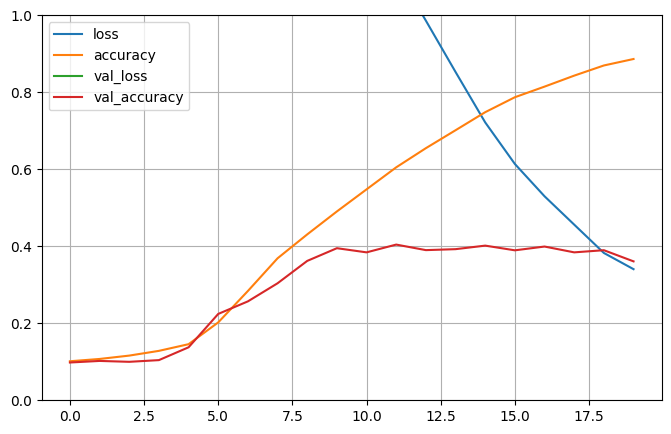

In [155]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [156]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 13.2920 - accuracy: 0.0996


[13.291979789733887, 0.09960000216960907]

# saving the model for checkpoint usage

In [157]:
model.save("cifar10.keras")
model = keras.models.load_model("cifar10.keras")